# EXERCISE SHEET 2: EXERCISE 3

Download the Wikibooks edits (de) and the US power grid networks from http://konect.cc/networks/.
The former is the bipartite edit network of the German Wikibooks. It contains users and
pages from the German Wikibooks, connected by edit events. Each edge represents an
edit. The latter represents the power grid of the US

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
#%matplotlib inline
import numpy as np

In [2]:
#This helper function allows to create an edgelist for the Wikibooks edits (de) network.
edge_list = []
with open("./edit-dewikibooks/out.edit-dewikibooks", mode='r') as fopen:
    for line in fopen:
        if not line.startswith('%'):
            user = line.split()[0] # 1st column is the user id
            article = line.split()[1] # 2nd column is the article id
            edge_list.append(('u'+user, 'a' + article))
           
       

G = nx.Graph()
G.add_edges_from(edge_list)

H = nx.read_edgelist('opsahl-powergrid/out.opsahl-powergrid', comments = '%', nodetype=int)

For each of the following questions, compute the requested values for both networks and
add a succinct explanation on what do you think can explain the difference or similarity
between the two values.

# QUESTION 1
For each network give their number of nodes and edges, their density and
their average degree.


# Answer 1

In [3]:
print('The number of nodes in the Wikibooks edits (de) network is ' + str(len(G.nodes())) + '.')
print('The number of edges in the Wikibooks edits (de) network is ' + str(len(G.edges())) + '.')
print('The density of the Wikibooks edits (de) network is ' + str(nx.density(G)) + '.')
print('The average degree of the Wikibooks edits (de) network is ' + str(np.mean([k for v, k in G.degree()])) + '.')

print('The number of nodes in the US power grid network is ' + str(len(H.nodes())) + '.')
print('The number of edges in the US power grid network is ' + str(len(H.edges())) + '.')
print('The density of the US power grid network is ' + str(nx.density(H)) + '.')
print('The average degree of the US power grid network is ' + str(np.mean([k for v, k in H.degree()])) + '.')

The number of nodes in the Wikibooks edits (de) network is 75507.
The number of edges in the Wikibooks edits (de) network is 167880.
The density of the Wikibooks edits (de) network is 5.889253883595384e-05.
The average degree of the Wikibooks edits (de) network is 4.4467400373475305.
The number of nodes in the US power grid network is 4941.
The number of edges in the US power grid network is 6594.
The density of the US power grid network is 0.0005403026973346214.
The average degree of the US power grid network is 2.66909532483303.


# QUESTION 2
What are the sizes of the largest and second largest connected components
of both networks?

# Answer 2

In [4]:
print('The number of connected components in the Wikibooks edits (de) network is ' + str(nx.number_connected_components(G)) + '.')
print('The number of connected components in the US power grid network is ' + str(nx.number_connected_components(H)) + '.')

The number of connected components in the Wikibooks edits (de) network is 660.
The number of connected components in the US power grid network is 1.


So, in the case of the US power grid, there is only one connected component.

In [5]:
CC = []
for i in nx.connected_components(G):
    CC.append(i)

first_CC = sorted(CC, key=len, reverse=True)[0]
second_CC = sorted(CC, key = len, reverse=True)[1]

print('The size of the largest connected component of the Wikibooks edits (de) network is ' + str(len(first_CC)) + '.')
print('The size of the second largest connected component of the Wikibooks edits (de) network is ' + str(len(second_CC)) + '.')


The size of the largest connected component of the Wikibooks edits (de) network is 74044.
The size of the second largest connected component of the Wikibooks edits (de) network is 13.


# QUESTION 3
What is the diameter of the US power grid network, and what is the average
shortest path length among nodes in it?


# Answer 3

In [6]:
print('The diameter of the US power grid network is ' + str(nx.diameter(H)) + '.')
print('The average shortest path length between nodes of the US power grid network is ' + str(nx.average_shortest_path_length(H)) + '.')



The diameter of the US power grid network is 46.
The average shortest path length between nodes of the US power grid network is 18.989185424445708.


# QUESTION 4

Given the German Wikibooks’ network size, computing the average shortest path
length of its largest component with the Networkx built-in function is too time-
consuming. Instead, try to estimate this quantity by sampling 1000 pairs of nodes
in the largest connected component, computing the shortest path length between
them, and averaging the results. Do the same for the US power grid network; you
should obtain a value close to the one found in the previous question.

You can ```import random``` and use the function ```random.sample(node_list, 2)``` where node_list contains a list of nodes
 to draw two nodes at random from the list.


In [7]:
import random
random.seed(0) #Random seeds gurantee reproducability when using pseudo-randomic functions, e.g. random.sample()

nodes_Gc = sorted(nx.connected_components(G), key=len, reverse=True)[0]
Gc = G.subgraph(nodes_Gc)


nodes = list(Gc.nodes())
distances=[]
for i in range(1000):
    n1,n2 = random.sample(nodes, 2)
    distances.append(nx.shortest_path_length(Gc,n1,n2))
print('The estimate of the average shortest path length between nodes of the Wikibooks edits (de) network is ' + str( np.mean(distances)) + '.')

nodes = list(H.nodes())
distances=[]
for i in range(1000):
    n1,n2 = random.sample(nodes, 2)
    distances.append(nx.shortest_path_length(H,n1,n2))

print('The estimate of the average shortest path length between nodes of the US power grid network is ' + str( np.mean(distances)) + '.')

The estimate of the average shortest path length between nodes of the Wikibooks edits (de) network is 4.158.
The estimate of the average shortest path length between nodes of the US power grid network is 18.718.


# QUESTION 5
Plot the histograms of the degrees distribution (PDF) on a lin-lin and log-log
scale for both networks

# Answer 5

In [8]:
plt.figure()
plt.subplots(figsize=(9, 4))

plt.subplot(121)
plt.plot(nx.degree_histogram(G))
plt.title('lin-lin scale',y=-0.3)
plt.xlabel('Degree')
plt.ylabel('Number of nodes')

plt.subplot(122)
plt.plot(nx.degree_histogram(G))
plt.xscale('log')
plt.yscale('log')
plt.title('log-log scale', y=-0.3)
plt.xlabel('Degree')
plt.ylabel('Number of nodes')

plt.suptitle('Histograms of the degrees distribution')
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

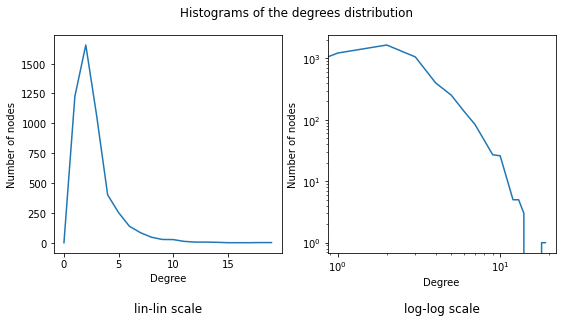

In [9]:
plt.figure()
plt.subplots(figsize=(9, 4))

plt.subplot(121)
plt.plot(nx.degree_histogram(H))
plt.title('lin-lin scale',y=-0.3)
plt.xlabel('Degree')
plt.ylabel('Number of nodes')

plt.subplot(122)
plt.plot(nx.degree_histogram(H))
plt.xscale('log')
plt.yscale('log')
plt.title('log-log scale', y=-0.3)
plt.xlabel('Degree')
plt.ylabel('Number of nodes')

plt.suptitle('Histograms of the degrees distribution')
plt.show()

# QUESTION 6
The value of the empirical CCDF at $k$ is defined as the number of elements in the sample larger or equal to $k$, normalized by the total number of elements. We can easily compute it without having to bin the data by reordering the samples and ploting their index position as a function of their value, for example with:

```python
def compute_CCDF(data, normalize=True):
    x = np.sort(data)[::-1]
    counts = x.size - np.searchsorted(x[::-1],x[::-1],side='left') # we need searchsorted to take into account duplicated values
    if normalize:
        counts = np.true_divide(counts, counts[-1])
    return x[::-1], counts
```

Plot the complementary cumulative distribution (CCDF) of the degrees on
a lin-lin scale and on a log-log scale for both networks.

# Answer 6

In [20]:
def compute_CCDF(data, normalize=True):
    x = np.sort(data)[::-1]
    counts = x.size - np.searchsorted(x[::-1],x[::-1],side='left') # we need searchsorted to take into account duplicated values

    if normalize:
        counts = np.true_divide(counts, counts[0])
    return x[::-1], counts

list_degree_G = list(k for v, k in G.degree())
CCDF_G = compute_CCDF(list_degree_G)

list_degree_H = list(k for v, k in H.degree())
CCDF_H = compute_CCDF(list_degree_H)

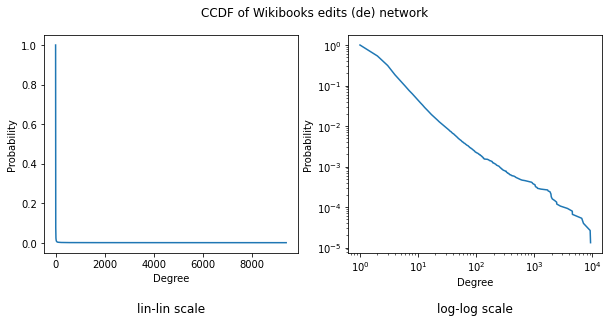

In [21]:

#plt.figure()
plt.subplots(figsize=(10, 4))

plt.subplot(121)
plt.plot(CCDF_G[0], CCDF_G[1])
plt.title('lin-lin scale',y=-0.3)
plt.xlabel('Degree')
plt.ylabel('Probability')

plt.subplot(122)
plt.plot(CCDF_G[0], CCDF_G[1])
plt.xscale('log')
plt.yscale('log')
plt.title('log-log scale', y=-0.3)
plt.xlabel('Degree')
plt.ylabel('Probability')

plt.suptitle('CCDF of Wikibooks edits (de) network')
plt.savefig('CCD_G')
plt.show()

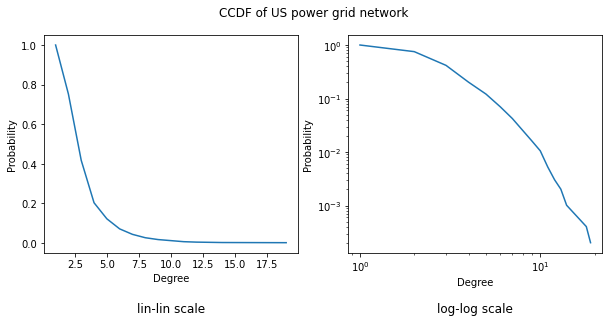

In [22]:
#plt.figure()
plt.subplots(figsize=(10, 4))

plt.subplot(121)
plt.plot(CCDF_H[0], CCDF_H[1])
plt.title('lin-lin scale',y=-0.3)
plt.xlabel('Degree')
plt.ylabel('Probability')

plt.subplot(122)
plt.plot(CCDF_H[0], CCDF_H[1])
plt.xscale('log')
plt.yscale('log')
plt.title('log-log scale', y=-0.3)
plt.xlabel('Degree')
plt.ylabel('Probability')

plt.suptitle('CCDF of US power grid network')
plt.savefig('CCD_H')
plt.show()

# QUESTION 7
One of these networks
is approximately scale-free; the other is not. Which is which and how can you tell?

# Answer 7


The Wikibooks edits (de) network has an apporixamtely linear CCDF in log-log scale, so it is approximately scale-free. The US power grid, on the other end, is not approximately scale-free.

# QUESTION 8
For the scale-free
network give an estimate of the exponent of the degree distribution.

# Answer 8

Let's look at the log-log scale plot of the CCDF of the Wikibooks edits (de) network. The variation of the CCDF (in logaritmic terms) with respect to one logaritmic step on the x axis is approximately -0.75, so we get that the exponent of the degree distribution is approximately 1.75 (because the absolute value of slope of the CCDF log-log scale plot is one less than the exponent).

# QUESTION 9
For both networks, only by looking at the CCDF, what is the value of the
degree k for which 90% of the nodes have a degree smaller than k? What about for
99% of the nodes?

# Answer 9

The degree k for which 90% of the nodes have a degree smaller than k is found by drawing a horizontal line crossing the y-axis at 10^-1 on the CCDF and seeing for which value of k it crosses the plot. The 90th precintile of both networks is theefore around 5. Similarly, one can see that the 99th percentile of the US power grid is around 10, whereas the the one of the Wikibooks edits one is around 30.